In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import json
import string

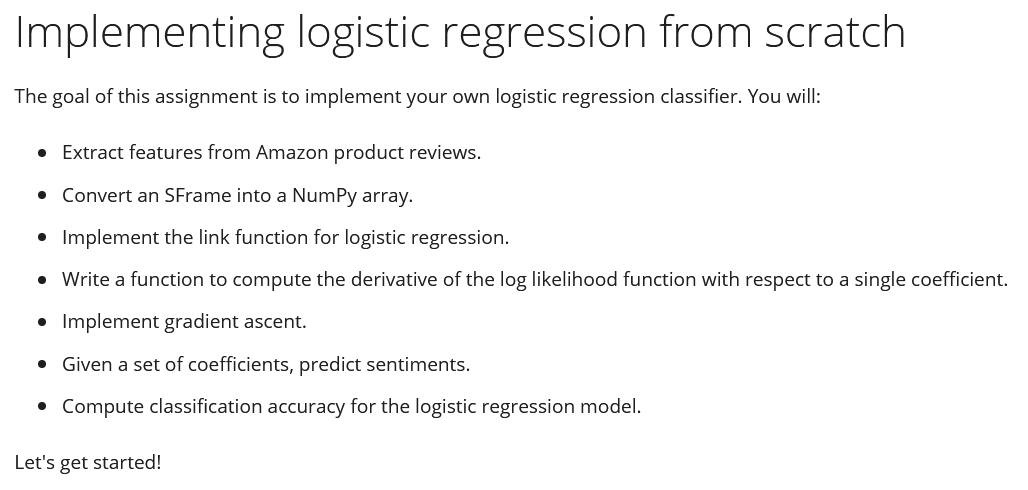

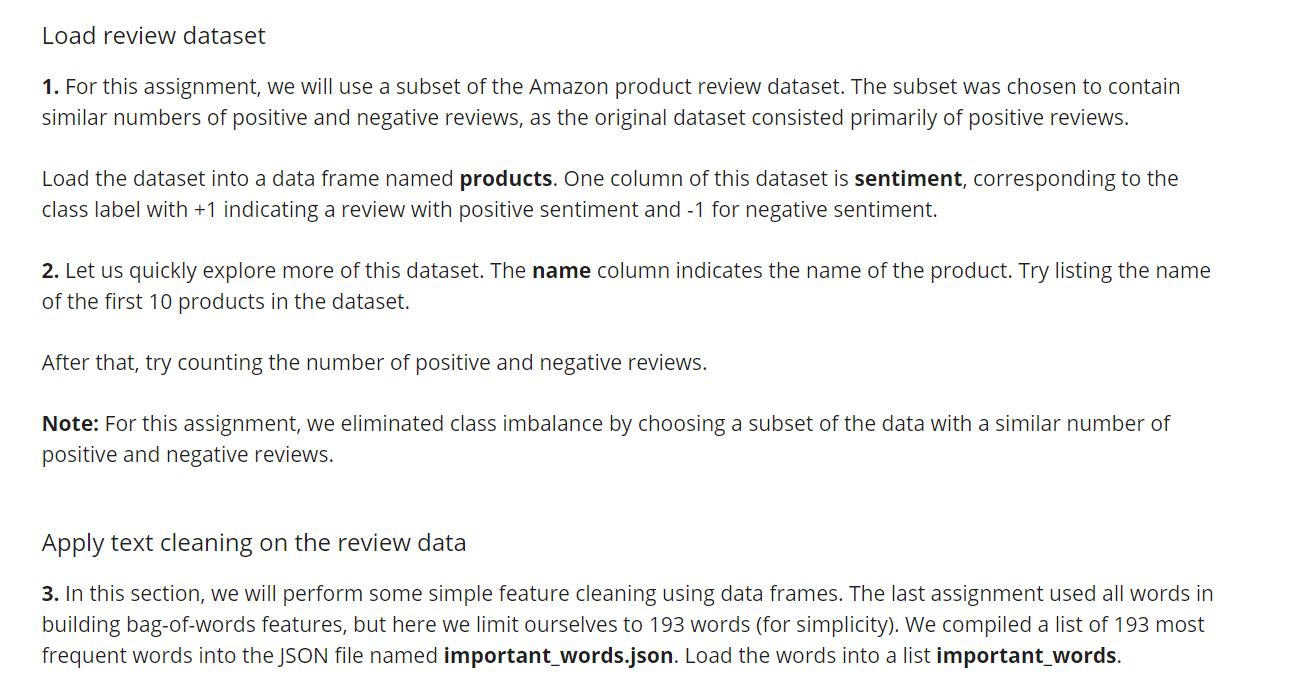

In [103]:
#products = pd.read_csv('amazon_baby_subset.csv')
#products.head()
products = pd.Series('amazon_baby_subset.csv')
products.head()

0    amazon_baby_subset.csv
dtype: object

In [100]:
products.isnull().sum()

0

In [101]:
# Name of first 10 products in the data-set
products['name'].head(10)

KeyError: 'name'

In [102]:
# Try counting the number of +ve and -ve reviews
positive_count = 0
negative_count = 0
for i in products['sentiment']:
    if i==1:  positive_count+=1
    else:     negative_count+=1
print('Count of Positive reviews : ',positive_count)
print('Count of Negative reviews : ',negative_count)

KeyError: 'sentiment'

In [66]:
print('Count of Positive reviews : ',len(products[products['sentiment']==1]))
print('Count of Negative reviews : ',len(products[products['sentiment']==-1]))

Count of Positive reviews :  26579
Count of Negative reviews :  26493


### 3) Apply text cleaning on the review data

In [67]:
with open('important_words.json','r') as f:
    important_words = json.load(f)
#important_words = [str(s) for s in important_words]
print(important_words)

['baby', 'one', 'great', 'love', 'use', 'would', 'like', 'easy', 'little', 'seat', 'old', 'well', 'get', 'also', 'really', 'son', 'time', 'bought', 'product', 'good', 'daughter', 'much', 'loves', 'stroller', 'put', 'months', 'car', 'still', 'back', 'used', 'recommend', 'first', 'even', 'perfect', 'nice', 'bag', 'two', 'using', 'got', 'fit', 'around', 'diaper', 'enough', 'month', 'price', 'go', 'could', 'soft', 'since', 'buy', 'room', 'works', 'made', 'child', 'keep', 'size', 'small', 'need', 'year', 'big', 'make', 'take', 'easily', 'think', 'crib', 'clean', 'way', 'quality', 'thing', 'better', 'without', 'set', 'new', 'every', 'cute', 'best', 'bottles', 'work', 'purchased', 'right', 'lot', 'side', 'happy', 'comfortable', 'toy', 'able', 'kids', 'bit', 'night', 'long', 'fits', 'see', 'us', 'another', 'play', 'day', 'money', 'monitor', 'tried', 'thought', 'never', 'item', 'hard', 'plastic', 'however', 'disappointed', 'reviews', 'something', 'going', 'pump', 'bottle', 'cup', 'waste', 'retu

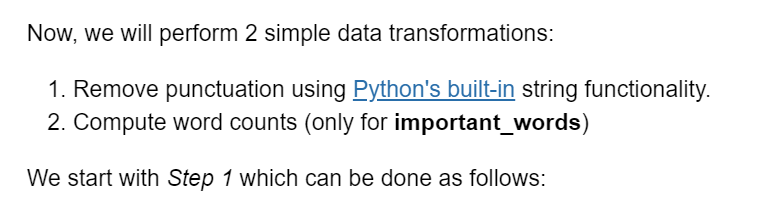

In [68]:
print('Before')
print(products.isnull().sum())

# Replacing the NaN values with None --> For removing the punctuations
products = products.fillna({'review':''})

print('After')
print(products.isnull().sum())

Before
name          90
review       241
rating         0
sentiment      0
dtype: int64
After
name         90
review        0
rating        0
sentiment     0
dtype: int64


In [69]:
def remove_punctuation(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

In [70]:
# Removing all the punctuations from the reviews
products['review_clean'] = products['review'].apply(remove_punctuation)
products.head()

,name,review,rating,sentiment,review_clean
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...


Now we proceed with *Step 2*. For each word in **important_words**, we compute a count for the number of times the word occurs in the review. We will store this count in a separate column (one for each word). The result of this feature processing is a single column for each word in **important_words** which keeps a count of the number of times the respective word occurs in the review text.


**Note:** There are several ways of doing this. In this assignment, we use the built-in *count* function for Python lists. Each review string is first split into individual words and the number of occurances of a given word is counted.

In [71]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s:s.split().count(word))
# The loop runs for a while, please wait

In [78]:
products.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,completely,wish,buying,babies,won,tub,almost,either,contains_perfect_1,contains_perfect_2
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,False,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,1,0,0,0,0,False,0


The SFrame products now contains one column for each of the 193 important_words. As an example, the column perfect contains a count of the number of times the word perfect occurs in each of the reviews.

### 6)
After #4 and #5, the data frame products should contain one column for each of the 193 important_words. As an example, the column perfect contains a count of the number of times the word perfect occurs in each of the reviews.

In [79]:
products['perfect']

0        0
1        0
2        0
3        1
4        0
        ..
53067    0
53068    0
53069    0
53070    0
53071    0
Name: perfect, Length: 53072, dtype: int64

### 7)
Now, write some code to compute the number of product reviews that contain the word perfect.

Hint:

* First create a column called contains_perfect which is set to 1 if the count of the word perfect (stored in column perfect is >= 1.
* Sum the number of 1s in the column contains_perfect.

#### Quiz Question. How many reviews contain the word perfect?

In [80]:
## Method-1
products['contains_perfect_1'] = products['perfect']>=1
perfect_count = 0
for i in products['contains_perfect_1']:
    if i==True:
        perfect_count+=1
products.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,completely,wish,buying,babies,won,tub,almost,either,contains_perfect_1,contains_perfect_2
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,False,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,1,0,0,0,0,False,0


In [81]:
print('The number of reviews containing the word "perfect" ',perfect_count)

The number of reviews containing the word "perfect"  2955


In [82]:
## Method-2
# contains_perfect_2 --> contains 1 if the 'perfect' word has appeared in a review atleast once, if not 0
products['contains_perfect_2'] = products['perfect'].apply(lambda x:1 if x>=1 else 0)

In [83]:
print('The number of reviews containing the word "perfect" ',sum(products['contains_perfect_2']))

The number of reviews containing the word "perfect"  2955


### 8) Convert the data-frame into multidimensional array

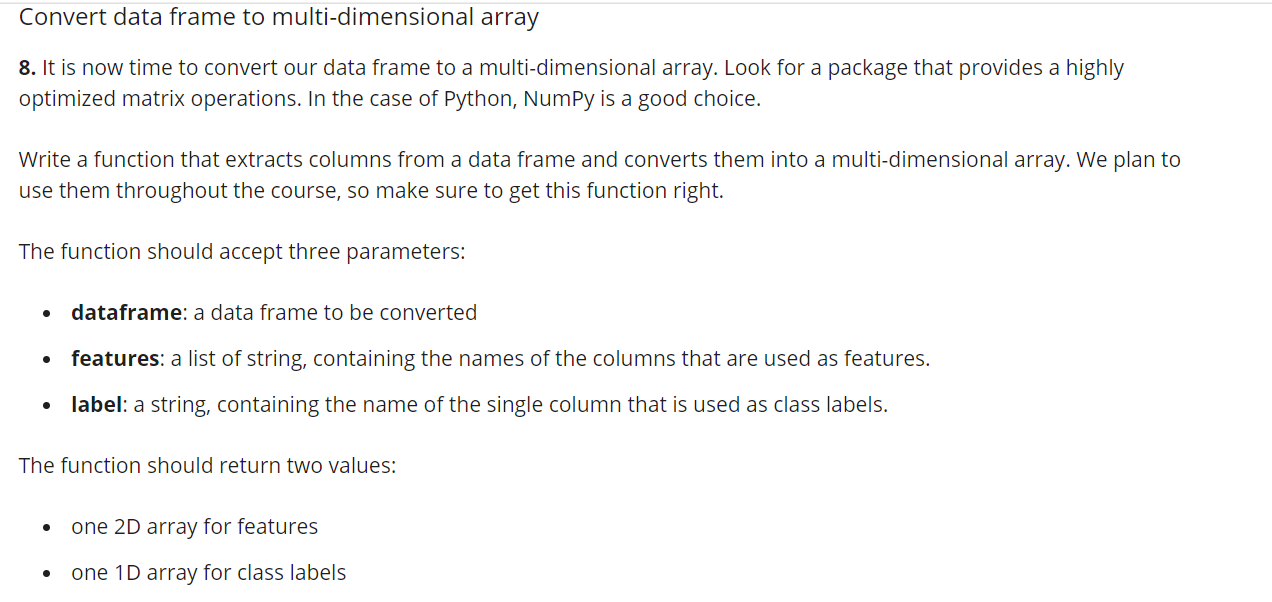

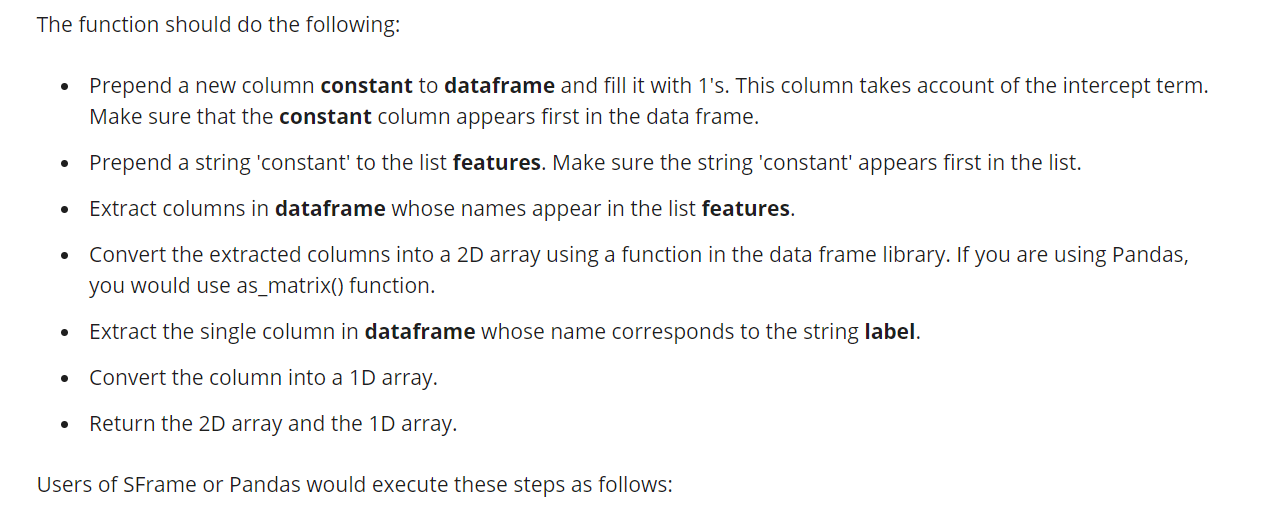

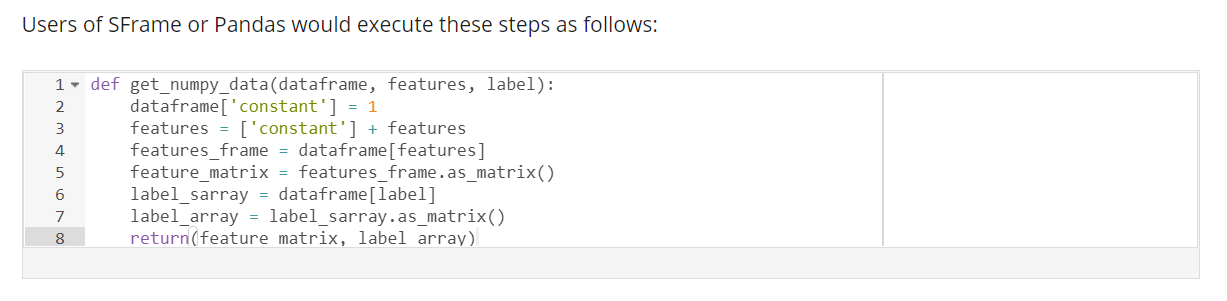

In [96]:
def get_numpy_data(data_sframe,features,label):
    products['constant']=1
    features = ['constant']+features
    feature_frame = data_sframe[features]
    feature_matrix = feature_frame.as_matrix()
    label_array    = data_sframe[labels]
    label_matrix   = label_array.as_matrix()
    return (feature_matrix,label_array)

In [98]:
feature_matrix,sentiment = get_numpy_data(products,important_words,'sentiment')

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['baby', 'one', 'great', 'love', 'use',\n       ...\n       'babies', 'won', 'tub', 'almost', 'either'],\n      dtype='object', length=193). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"